In [13]:
#imports, nothing to see here
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
n = 10
arms = np.random.rand(n)
eps = 0.1

In [15]:
def get_reward(prob):
    reward = 0
    for i in range(10):
        if random.random() < prob:
            reward += 1
    return reward

In [16]:
# initialize memory array; has 1 row defaulted to random action index
av = np.array([np.random.randint(0,(n+1)), 0]).reshape(1,2) #av = action-value

# greedy method to select best arm based on memory array (historical results)
def get_best_arm(a):
    best_arm = 0  # just default to 0
    best_mean = 0
    for u in a:
        avg = np.mean(   a[np.where( a[:,0] == u[0] )]  [:, 1]   )  # calc mean reward for each action
        if best_mean < avg:
            best_mean = avg
            best_arm = u[0]
    return best_arm

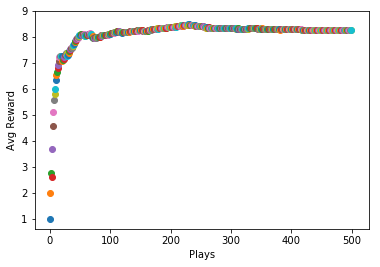

In [17]:
plt.xlabel("Plays")
plt.ylabel("Avg Reward")
for i in range(500):
    if random.random() > eps: #greedy arm selection
        choice = get_best_arm(av)
        thisAV = np.array([[choice, get_reward(arms[choice])]])
        av = np.concatenate((av, thisAV), axis=0)
    else: #random arm selection
        choice = np.where(arms == np.random.choice(arms))[0][0]
        thisAV = np.array([[choice, get_reward(arms[choice])]]) #choice, reward 
        av = np.concatenate((av, thisAV), axis=0) #add to our action-value memory array
    #calculate the percentage the correct arm is chosen (you can plot this instead of reward)
    percCorrect = 100*(len(av[np.where(av[:,0] == np.argmax(arms))])/len(av))
    #calculate the mean reward
    runningMean = np.mean(av[:,1])
    plt.scatter(i, runningMean)

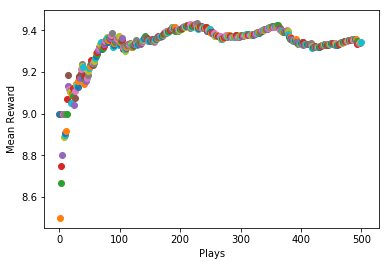

In [18]:
n = 10
arms = np.random.rand(n)
eps = 0.1

av = np.ones(n) #initialize action-value array
counts = np.zeros(n) #stores counts of how many times we've taken a particular action

def reward(prob):
    total = 0;
    for i in range(10):
        if random.random() < prob:
            total += 1
    return total

#our bestArm function is much simpler now
def bestArm(a):
    return np.argmax(a) #returns index of element with greatest value
    
plt.xlabel("Plays")
plt.ylabel("Mean Reward")
for i in range(500):
    if random.random() > eps:
        choice = bestArm(av)
        counts[choice] += 1
        k = counts[choice]
        rwd =  reward(arms[choice])
        old_avg = av[choice]
        new_avg = old_avg + (1/k)*(rwd - old_avg) #update running avg
        av[choice] = new_avg
    else:
        choice = np.where(arms == np.random.choice(arms))[0][0] #randomly choose an arm (returns index)
        counts[choice] += 1
        k = counts[choice]
        rwd =  reward(arms[choice])
        old_avg = av[choice]
        new_avg = old_avg + (1/k)*(rwd - old_avg) #update running avg
        av[choice] = new_avg
    #have to use np.average and supply the weights to get a weighted average
    runningMean = np.average(av, weights=np.array([counts[j]/np.sum(counts) for j in range(len(counts))]))
    plt.scatter(i, runningMean)

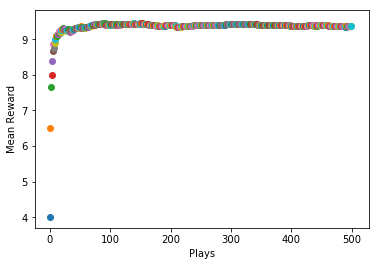

In [19]:
n = 10
arms = np.random.rand(n)

av = np.ones(n) #initialize action-value array, stores running reward mean
counts = np.zeros(n) #stores counts of how many times we've taken a particular action
#stores our softmax-generated probability ranks for each action
av_softmax = np.zeros(n)
av_softmax[:] = 0.1 #initialize each action to have equal probability

def reward(prob):
    total = 0;
    for i in range(10):
        if random.random() < prob:
            total += 1
    return total

tau = 1.12 #tau was selected by trial and error
def softmax(av):
    probs = np.zeros(n)
    for i in range(n):
        softm = ( np.exp(av[i] / tau) / np.sum( np.exp(av[:] / tau) ) )
        probs[i] = softm
    return probs

plt.xlabel("Plays")
plt.ylabel("Mean Reward")
for i in range(500):
    #select random arm using weighted probability distribution
    choice = np.where(arms == np.random.choice(arms, p=av_softmax))[0][0]
    counts[choice] += 1
    k = counts[choice]
    rwd =  reward(arms[choice])
    old_avg = av[choice]
    new_avg = old_avg + (1/k)*(rwd - old_avg)
    av[choice] = new_avg
    av_softmax = softmax(av) #update softmax probabilities for next play
        
    runningMean = np.average(av, weights=np.array([counts[j]/np.sum(counts) for j in range(len(counts))]))
    plt.scatter(i, runningMean)